In [1]:
import os
import re

from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from functools import partial

In [2]:
# Input and output filepaths
train_clean_100_path = os.path.join("data", "train-clean-100.csv")
dev_clean_path = os.path.join("data", "dev-clean.csv")
test_clean_path = os.path.join("data", "test-clean.csv")

train_clean_100_outpath = os.path.join("data", "preprocessed-train-clean-100.csv")
dev_clean_outpath = os.path.join("data", "preprocessed-dev-clean.csv")
test_clean_outpath = os.path.join("data", "preprocessed-test-clean.csv")

os.makedirs("data", exist_ok=True)

In [3]:
# Read the csv files
train_df = pd.read_csv(train_clean_100_path, index_col=0)
dev_df = pd.read_csv(dev_clean_path, index_col=0)
test_df = pd.read_csv(test_clean_path, index_col=0)

# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

train_df =  pd.DataFrame({"TEXT": train_df["REAL TEXT"].apply(str.lower).apply(decontracted), "BOOK": train_df["BOOK TITLE"]})
dev_df = pd.DataFrame({"TEXT": dev_df["TEXT"].apply(str.lower).apply(decontracted), "BOOK": dev_df["BOOK TITLE"]})
test_df = pd.DataFrame({"TEXT": test_df["TEXT"].apply(str.lower).apply(decontracted), "BOOK": test_df["BOOK TITLE"]})

train_df

,TEXT,BOOK
0,till they would finally circle round and round...,"The Life of Hon. William F. Cody, Known as Buf..."
1,as cincinnatus or cornelia now to such a quiet...,"Divine Comedy, Longfellow's Translation, Complete"
2,louise and beth having at last full knowledge ...,Aunt Jane's Nieces
3,mode beard the oysters and scald them in their...,The Book of Household Management
4,she said she was not absolutely certain of the...,The Professor
...,...,...
300,well mister markham what is it said the young ...,The Tenant of Wildfell Hall
301,put her into a carriage and ministered to her ...,The Ashiel mystery: A Detective Story
302,which it contained and where to meet her at mi...,Tanglewood Tales
303,so far from being in favour with the aristocra...,A Tale of Two Cities


In [4]:
# Tokenize the books into lists of words
tok_train_df = pd.DataFrame(train_df, copy=True)
tok_dev_df = pd.DataFrame(dev_df, copy=True)
tok_test_df = pd.DataFrame(test_df, copy=True)

tok_train_df["TEXT"] = tok_train_df["TEXT"].apply(word_tokenize)
tok_train_df["N_WORDS"] = tok_train_df["TEXT"].apply(len)
tok_train_df["U_WORDS"] = tok_train_df["TEXT"].apply(set).apply(len)

tok_dev_df["TEXT"] = tok_dev_df["TEXT"].apply(word_tokenize)
tok_dev_df["N_WORDS"] = tok_dev_df["TEXT"].apply(len)
tok_dev_df["U_WORDS"] = tok_dev_df["TEXT"].apply(set).apply(len)

tok_test_df["TEXT"] = tok_test_df["TEXT"].apply(word_tokenize)
tok_test_df["N_WORDS"] = tok_test_df["TEXT"].apply(len)
tok_test_df["U_WORDS"] = tok_test_df["TEXT"].apply(set).apply(len)

tok_train_df

,TEXT,BOOK,N_WORDS,U_WORDS
0,"[till, they, would, finally, circle, round, an...","The Life of Hon. William F. Cody, Known as Buf...",3435,1003
1,"[as, cincinnatus, or, cornelia, now, to, such,...","Divine Comedy, Longfellow's Translation, Complete",4480,1407
2,"[louise, and, beth, having, at, last, full, kn...",Aunt Jane's Nieces,3368,1007
3,"[mode, beard, the, oysters, and, scald, them, ...",The Book of Household Management,864,316
4,"[she, said, she, was, not, absolutely, certain...",The Professor,1266,535
...,...,...,...,...
300,"[well, mister, markham, what, is, it, said, th...",The Tenant of Wildfell Hall,2659,834
301,"[put, her, into, a, carriage, and, ministered,...",The Ashiel mystery: A Detective Story,4442,1273
302,"[which, it, contained, and, where, to, meet, h...",Tanglewood Tales,3527,1072
303,"[so, far, from, being, in, favour, with, the, ...",A Tale of Two Cities,1781,636


In [5]:
# Remove stop words from books
stop_train_df = pd.DataFrame(tok_train_df, copy=True)
stop_dev_df = pd.DataFrame(tok_dev_df, copy=True)
stop_test_df = pd.DataFrame(tok_test_df, copy=True)

_stopwords = set(stopwords.words('english'))
stopwords_filter = partial(filter, lambda w: w not in _stopwords)

stop_train_df["TEXT"] = stop_train_df["TEXT"].apply(stopwords_filter).apply(list)
stop_train_df["N_WORDS"] = stop_train_df["TEXT"].apply(len)
stop_train_df["U_WORDS"] = stop_train_df["TEXT"].apply(set).apply(len)

stop_dev_df["TEXT"] = stop_dev_df["TEXT"].apply(stopwords_filter).apply(list)
stop_dev_df["N_WORDS"] = stop_dev_df["TEXT"].apply(len)
stop_dev_df["U_WORDS"] = stop_dev_df["TEXT"].apply(set).apply(len)

stop_test_df["TEXT"] = stop_test_df["TEXT"].apply(stopwords_filter).apply(list)
stop_test_df["N_WORDS"] = stop_test_df["TEXT"].apply(len)
stop_test_df["U_WORDS"] = stop_test_df["TEXT"].apply(set).apply(len)

stop_train_df

,TEXT,BOOK,N_WORDS,U_WORDS
0,"[till, would, finally, circle, round, round, m...","The Life of Hon. William F. Cody, Known as Buf...",1598,901
1,"[cincinnatus, cornelia, quiet, beautiful, life...","Divine Comedy, Longfellow's Translation, Complete",2090,1290
2,"[louise, beth, last, full, knowledge, cousin, ...",Aunt Jane's Nieces,1671,897
3,"[mode, beard, oysters, scald, liquor, add, wel...",The Book of Household Management,477,251
4,"[said, absolutely, certain, wisdom, step, take...",The Professor,592,453
...,...,...,...,...
300,"[well, mister, markham, said, young, mother, a...",The Tenant of Wildfell Hall,1162,728
301,"[put, carriage, ministered, wants, help, tea, ...",The Ashiel mystery: A Detective Story,2041,1159
302,"[contained, meet, midnight, brave, added, dayb...",Tanglewood Tales,1710,964
303,"[far, favour, aristocrat, government, actually...",A Tale of Two Cities,795,542


In [6]:
# Stem the words in each book to a simpler form using a lemmatizer
lemm_train_df = pd.DataFrame(stop_train_df, copy=True)
lemm_dev_df = pd.DataFrame(stop_dev_df, copy=True)
lemm_test_df = pd.DataFrame(stop_test_df, copy=True)

_lemmatizer = WordNetLemmatizer()
lemmatize = lambda tokens: [_lemmatizer.lemmatize(token, pos=pos[0].lower()) 
                            if pos[0].lower() in ["a", "n", "v"] else token
                            for token, pos in pos_tag(tokens)]


lemm_train_df["TEXT"] = lemm_train_df["TEXT"].apply(lemmatize).apply(list)
lemm_train_df["N_WORDS"] = lemm_train_df["TEXT"].apply(len)
lemm_train_df["U_WORDS"] = lemm_train_df["TEXT"].apply(set).apply(len)

lemm_dev_df["TEXT"] = lemm_dev_df["TEXT"].apply(lemmatize).apply(list)
lemm_dev_df["N_WORDS"] = lemm_dev_df["TEXT"].apply(len)
lemm_dev_df["U_WORDS"] = lemm_dev_df["TEXT"].apply(set).apply(len)

lemm_test_df["TEXT"] = lemm_test_df["TEXT"].apply(lemmatize).apply(list)
lemm_test_df["N_WORDS"] = lemm_test_df["TEXT"].apply(len)
lemm_test_df["U_WORDS"] = lemm_test_df["TEXT"].apply(set).apply(len)

lemm_train_df

In [ ]:
out_train_df = pd.DataFrame(lemm_train_df, copy=True)
out_dev_df = pd.DataFrame(lemm_dev_df, copy=True)
out_test_df = pd.DataFrame(lemm_test_df, copy=True)

out_train_df.to_csv(train_clean_100_outpath, columns=["TEXT", "BOOK"])
out_dev_df.to_csv(dev_clean_outpath, columns=["TEXT", "BOOK"])
out_test_df.to_csv(test_clean_outpath, columns=["TEXT", "BOOK"])

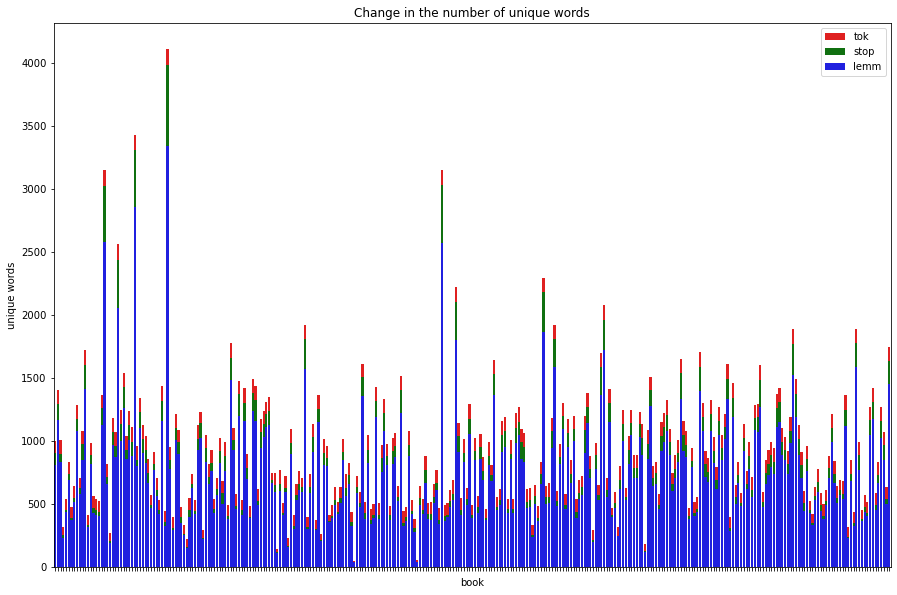

,X,Y,Z,W
0,"The Life of Hon. William F. Cody, Known as Buf...",1003,901,806
1,"Divine Comedy, Longfellow's Translation, Complete",1407,1290,1165
2,Aunt Jane's Nieces,1007,897,833
3,The Book of Household Management,316,251,225
4,The Professor,535,453,433
...,...,...,...,...
300,The Tenant of Wildfell Hall,834,728,668
301,The Ashiel mystery: A Detective Story,1273,1159,1027
302,Tanglewood Tales,1072,964,852
303,A Tale of Two Cities,636,542,498


In [ ]:
df = pd.DataFrame({
    'X': tok_train_df["BOOK"],
    'Y': tok_train_df["U_WORDS"],
    'Z': stop_train_df["U_WORDS"],
    'W': lemm_train_df["U_WORDS"]
})

# creating subplots
ax = plt.subplots(figsize=(15, 10))
  
# plotting columns
ax = sns.barplot(x=df["X"], y=df["Y"], color='r', label="tok")
ax = sns.barplot(x=df["X"], y=df["Z"], color='g', label="stop")
ax = sns.barplot(x=df["X"], y=df["W"], color='b', label="lemm")

# renaming the axes
ax.set(xlabel="book", ylabel="unique words")
ax.set(xticklabels=[])
ax.set_title("Change in the number of unique words")
ax.legend()
  
# visulaizing illustration
plt.show()

df

In [ ]:
# Unique words after each step: tokenization, stopwords removal and lemmatization
df.describe()

,Y,Z,W
count,305.000000,305.000000,305.000000
mean,931.898361,834.232787,750.140984
std,503.235668,491.443331,419.752398
min,44.000000,35.000000,35.000000
25%,575.000000,488.000000,454.000000
50%,867.000000,753.000000,684.000000
75%,1178.000000,1068.000000,944.000000
max,4113.000000,3989.000000,3345.000000


In [ ]:
x = len(set(tok_train_df["TEXT"].sum()))
y = len(set(tok_dev_df["TEXT"].sum()))
z = len(set(tok_test_df["TEXT"].sum()))

print(f"Number of unique words in the train set {x}")
print(f"Number of unique words in the dev set {y}")
print(f"Number of unique words in the test set {z}")

Number of unique words in the train set 32367
Number of unique words in the dev set 8159
Number of unique words in the test set 7943


In [ ]:
x = len(set(lemm_train_df["TEXT"].sum()))
y = len(set(lemm_dev_df["TEXT"].sum()))
z = len(set(lemm_test_df["TEXT"].sum()))

print(f"Number of unique words in the train set after preprocessing {x}")
print(f"Number of unique words in the dev set after preprocessing {y}")
print(f"Number of unique words in the test set after preprocessing {z}")

Number of unique words in the train set after preprocessing 25805
Number of unique words in the dev set after preprocessing 6532
Number of unique words in the test set after preprocessing 6381
